In [2]:
print(df)

          date factor  best_lambda  best_kappa
0   2014-01-31    iwf   142.377849         7.0
48  2014-01-31   qual     3.401840         7.0
120 2014-01-31   vlue   170.712034         9.0
96  2014-01-31   usmv    31.593408         8.0
72  2014-01-31   size     0.533703         2.0
..         ...    ...          ...         ...
95  2025-04-03   size     2.893733         2.0
47  2025-04-03   mtum    19.673464         5.0
23  2025-04-03    iwf    60.360374         8.0
119 2025-04-03   usmv   140.847370        10.0
143 2025-04-03   vlue   816.552845         4.0

[144 rows x 4 columns]


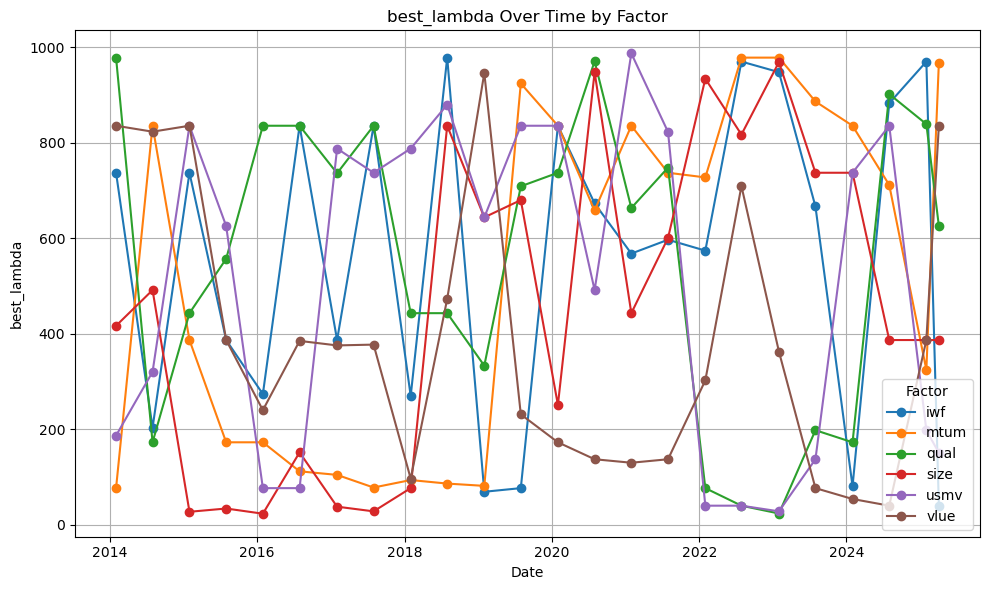

In [4]:
#!/usr/bin/env python3
"""
simple_lambda_plot.py

Load the Parquet file "Riskoff_CV_output.parquet" and plot the `best_lambda` time series for each factor.
"""

import os
import pandas as pd
import matplotlib.pyplot as plt

# File path in working directory
parquet_path = "Main_CV_output.parquet"

if not os.path.exists(parquet_path):
    raise FileNotFoundError(f"Parquet file not found: {parquet_path}")

# Load data
_df = pd.read_parquet(parquet_path)

df = _df.copy()
# Ensure datetime, sort
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Pivot so each factor is a column
lambda_ts = df.pivot(index='date', columns='factor', values='best_lambda')

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
for factor in lambda_ts.columns:
    ax.plot(lambda_ts.index, lambda_ts[factor], marker='o', linestyle='-', label=factor)

ax.set_xlabel('Date')
ax.set_ylabel('best_lambda')
ax.set_title('best_lambda Over Time by Factor')
ax.legend(title='Factor')
ax.grid(True)
plt.tight_layout()
plt.show()
